In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

There are 14 variables in the data which are

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population

MEDV - Median value of owner-occupied homes in $1000's

In [2]:
df = pd.read_csv('dataset.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
df.shape

(506, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
df.nunique()   #identifies unique number of values

CRIM       484
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        348
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      438
MEDV       229
dtype: int64

In [6]:
df.isnull().sum()       #checking for missing values

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [7]:
#filling null values with mean
df['CRIM'].fillna((df['CRIM'].mean()), inplace=True)
df['ZN'].fillna((0), inplace=True)
df['INDUS'].fillna((df['INDUS'].mean()), inplace=True)
df['CHAS'].fillna((0), inplace=True)
df['AGE'].fillna((df['AGE'].mean()), inplace=True)
df['LSTAT'].fillna((0), inplace=True)

In [8]:
df.isnull().sum()  #again checking for null values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

On again checking the null values, we see that there are no null values in the dataset. The null values have been filled by mean values of each column.

In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.611874,10.768775,11.083992,0.067194,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.212846,22.532806
std,8.545770,23.025124,6.699165,0.250605,0.115878,0.702617,27.439466,2.105710,8.707259,168.537116,2.164946,91.294864,7.438324,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,0.000000,5.000000
25%,0.083235,0.000000,5.190000,0.000000,0.449000,5.885500,45.925000,2.100175,4.000000,279.000000,17.400000,375.377500,6.590000,17.025000
50%,0.290250,0.000000,9.900000,0.000000,0.538000,6.208500,74.450000,3.207450,5.000000,330.000000,19.050000,391.440000,10.925000,21.200000
75%,3.611874,0.000000,18.100000,0.000000,0.624000,6.623500,93.575000,5.188425,24.000000,666.000000,20.200000,396.225000,16.570000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


From the above table we can see that the values of MEDV > 50 won't help in prediction.

In [10]:
corr = df.corr()
corr                        #displaying correlation matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182113,0.391161,-0.053710,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.408679,-0.379695
ZN,-0.182113,1.000000,-0.507800,-0.032992,-0.498619,0.312295,-0.534831,0.632428,-0.300061,-0.304385,-0.394622,0.170125,-0.361012,0.362292
INDUS,0.391161,-0.507800,1.000000,0.054172,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.542982,-0.478657
CHAS,-0.053710,-0.032992,0.054172,1.000000,0.070867,0.106797,0.073549,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.040427,0.183844
NOX,0.410377,-0.498619,0.740965,0.070867,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.549209,-0.427321
RM,-0.215434,0.312295,-0.381457,0.106797,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.584754,0.695360
AGE,0.344934,-0.534831,0.614592,0.073549,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.561402,-0.380223
DIS,-0.366523,0.632428,-0.699639,-0.092318,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.456922,0.249929
RAD,0.608886,-0.300061,0.593176,-0.003339,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.438134,-0.381626
TAX,0.566528,-0.304385,0.716062,-0.035822,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.494026,-0.468536


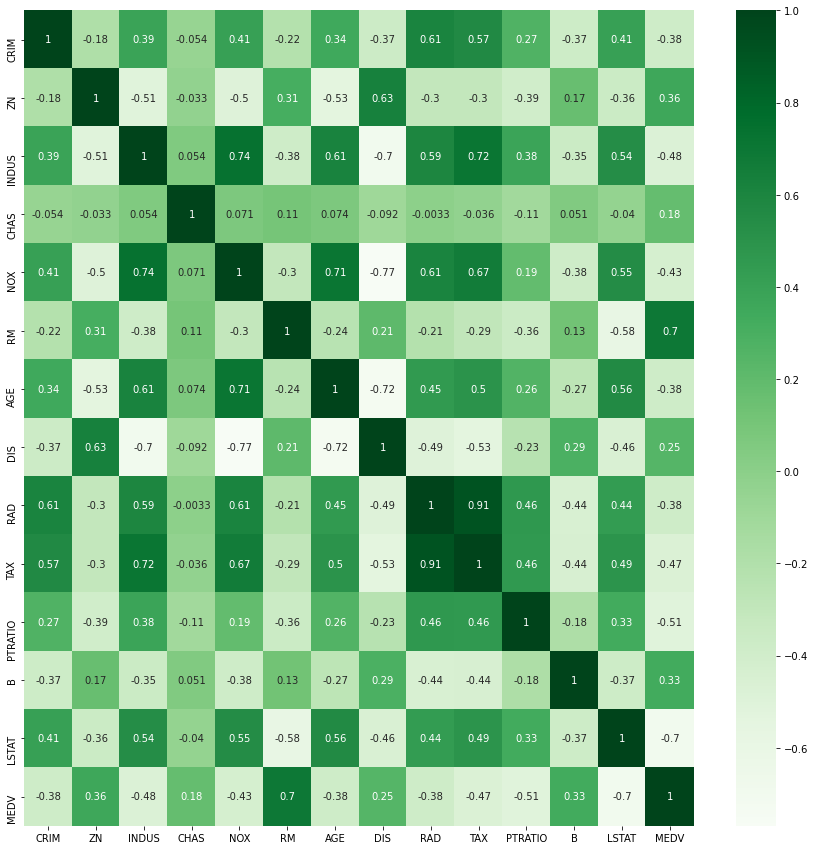

In [11]:
#plotting the heatmap
plt.figure(figsize= (15,15))
sns.heatmap(corr, annot = True, cmap="Greens")
plt.show()

From  the above heatmap we can see that TAX and RAD are higly correlated.

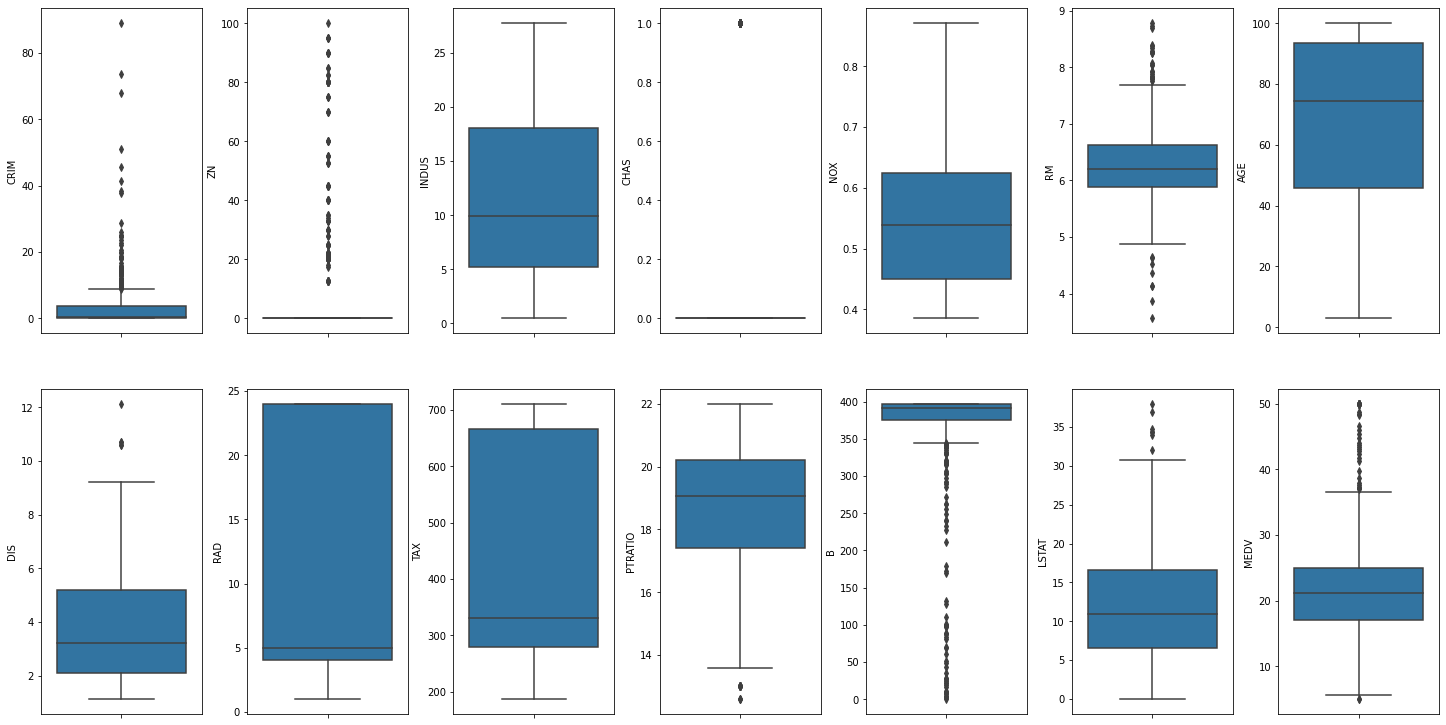

In [12]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

columns like CRIM, ZN, MEDV, LSTAT seem to have outliers.

In [13]:
#outliers percentage
for k,v in df.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  iqr = q3 - q1
  v_col = v[(v<= q1 - 1.5*iqr) | (v>=q3 + 1.5*iqr)]
  perc = (np.shape(v_col)[0]  / np.shape(df)[0] )*100.0
  print("column {} outliers = {}%".format(k,perc))

column CRIM outliers = 12.648221343873518%
column ZN outliers = 100.0%
column INDUS outliers = 0.0%
column CHAS outliers = 100.0%
column NOX outliers = 0.0%
column RM outliers = 5.928853754940711%
column AGE outliers = 0.0%
column DIS outliers = 0.9881422924901186%
column RAD outliers = 0.0%
column TAX outliers = 0.0%
column PTRATIO outliers = 2.9644268774703555%
column B outliers = 15.217391304347828%
column LSTAT outliers = 1.383399209486166%
column MEDV outliers = 7.905138339920949%


In [14]:
df = df[~(df['MEDV']>=50.0)]
df.shape

(490, 14)

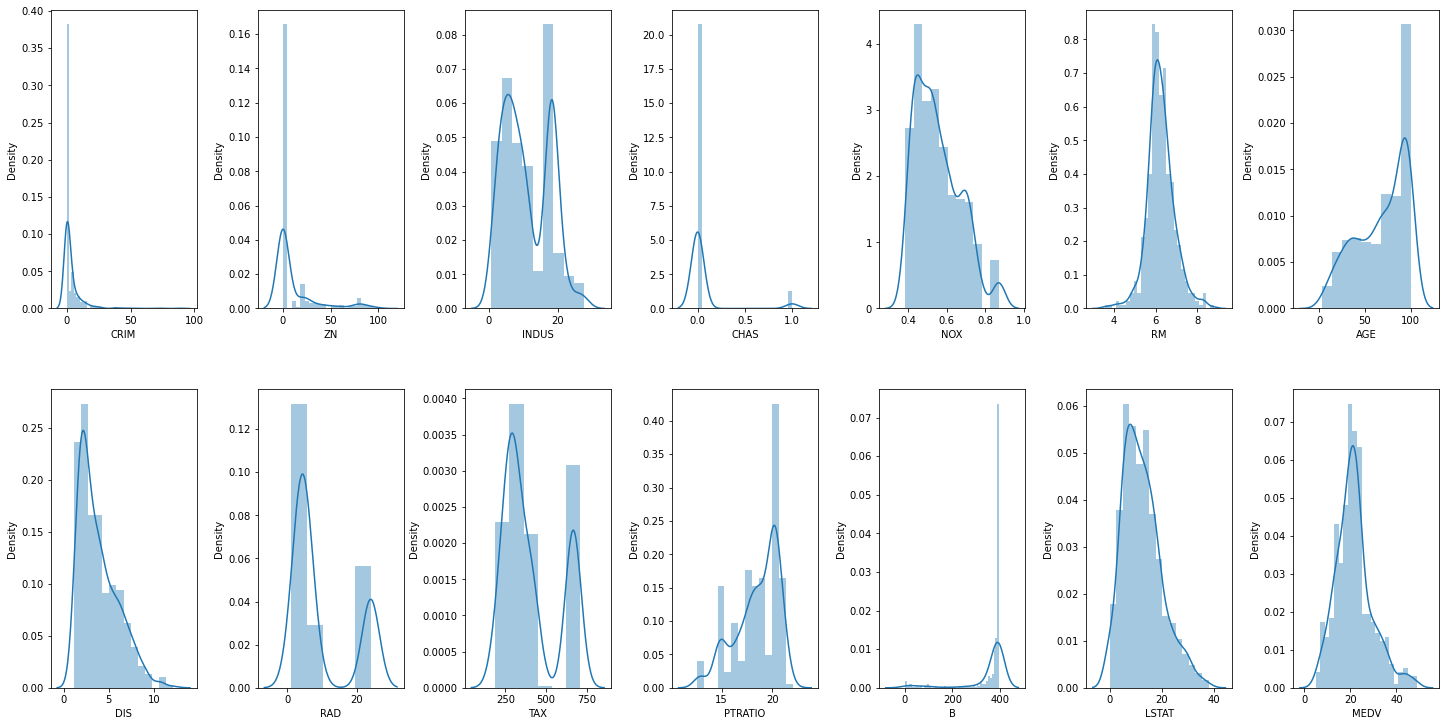

In [15]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [16]:
df = df.reset_index()

In [17]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [18]:
print(X)

[[0.0000e+00 6.3200e-03 1.8000e+01 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [1.0000e+00 2.7310e-02 0.0000e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.0000e+00 2.7290e-02 0.0000e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [5.0300e+02 6.0760e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [5.0400e+02 1.0959e-01 0.0000e+00 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [5.0500e+02 4.7410e-02 0.0000e+00 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [19]:
print(y)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  22.7 25.  23.8 23.8 22.3 17.4 19.1
 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2 37.9 32.5 26.4 29.6
 32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 33.3 30.3 34.6 34.9 32.9 24.1
 42.3 

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [21]:
X_train

array([[4.44000e+02, 1.28023e+01, 0.00000e+00, ..., 2.02000e+01,
        2.40520e+02, 2.37900e+01],
       [5.80000e+01, 1.54450e-01, 2.50000e+01, ..., 1.97000e+01,
        3.90680e+02, 6.86000e+00],
       [3.88000e+02, 1.43337e+01, 0.00000e+00, ..., 2.02000e+01,
        3.72920e+02, 3.06200e+01],
       ...,
       [4.12000e+02, 1.88110e+01, 0.00000e+00, ..., 2.02000e+01,
        2.87900e+01, 3.43700e+01],
       [2.43000e+02, 1.27570e-01, 3.00000e+01, ..., 1.66000e+01,
        3.74710e+02, 5.19000e+00],
       [3.70000e+01, 8.01400e-02, 0.00000e+00, ..., 1.92000e+01,
        3.96900e+02, 8.77000e+00]])

In [22]:
X_test

array([[3.64000e+02, 3.47428e+00, 0.00000e+00, ..., 2.02000e+01,
        3.54550e+02, 5.29000e+00],
       [1.07000e+02, 1.31170e-01, 0.00000e+00, ..., 2.09000e+01,
        3.87690e+02, 1.40900e+01],
       [1.69000e+02, 2.44953e+00, 0.00000e+00, ..., 1.47000e+01,
        3.30040e+02, 1.13200e+01],
       ...,
       [1.19000e+02, 1.44760e-01, 0.00000e+00, ..., 1.78000e+01,
        3.91500e+02, 1.36100e+01],
       [2.71000e+02, 1.62110e-01, 2.00000e+01, ..., 1.86000e+01,
        3.96900e+02, 0.00000e+00],
       [4.45000e+02, 1.06718e+01, 0.00000e+00, ..., 2.02000e+01,
        4.30600e+01, 2.39800e+01]])

In [23]:
y_train

array([10.8, 23.3, 10.2, 21.2, 12.7, 36. , 19.5, 26.5, 31.7, 26.4, 14.5,
       32.5, 25. , 13.4, 18.7, 20.2, 34.9, 11.7, 25. , 26.6, 15.6, 16.1,
       24.5, 20.3, 20.6, 30.7, 28. , 20. , 17.8, 18.1, 25. , 13.1, 23.9,
       10.5, 22.6, 14.9, 23.8, 13.4, 31.5, 19.5, 33.1, 21.7, 11.5, 23.1,
       20.8, 28.4, 20.5, 14.5, 20.4, 16. , 28.4, 30.8, 13.8, 11. ,  6.3,
       23.1, 43.8, 36.4, 13.1, 20.6,  8.8, 21.2, 17.5, 43.5, 16.2, 24.8,
       19.9, 41.7, 14.8, 28.7, 12.5, 23.4, 19. , 29.4, 22.7, 20.9, 21.7,
       22. , 22.4, 24.3, 10.5, 21.4, 17.6, 29.1, 19.6, 22. , 21.7, 12.7,
       17.8, 22. , 11.9, 27.1, 41.3, 32.7, 30.5, 17.7, 29.6, 21.4, 23.7,
       14.9, 15.4, 19.3, 23.6, 18.5, 19.6, 18.8, 29.9, 23.1, 30.3, 18.2,
        8.5, 13.3, 17.3, 13.3, 22.8, 20.5, 18.8, 18.9, 18.2, 23.1, 18.2,
       24. , 30.1, 19.5, 35.4, 14.3, 15.2, 36.1, 14.1, 24.2, 16.1, 20.9,
       20.6, 24.7, 21.5, 22. , 19.5, 23.8, 19.1, 24.4, 28.1, 31.1,  8.4,
       12. , 13.8, 45.4, 11.7,  5. , 22.9, 27.5, 25

In [24]:
y_test

array([21.9, 20.4, 22.3, 48.5, 21.1, 23.8, 21.8, 24.6, 13.5, 20.7, 22. ,
       26.6, 21.1, 23.7, 19.7, 17.1, 10.4, 23. , 23.3, 26.7, 18.3, 14.5,
       10.2, 28.6, 34.6, 18. , 24.6, 13. , 13.4, 17.8, 37. , 29.1, 32.2,
       36.2, 26.4, 17.1, 20.1, 24.8, 42.8, 20.1, 17.2, 16.6, 25. , 19.4,
        9.7, 23. , 22.2, 24.1, 28.7, 22.1, 19.2, 10.9, 18.6, 19.8, 17.5,
       24.4, 13.8, 33.4, 37.6, 20.1, 13.6, 23.5, 48.3, 23.8, 14.1, 10.9,
       20.8, 14.6, 22.8, 21. , 23.2, 19.9, 10.2, 16.5, 21.9, 18.6, 33.1,
       11.3, 20.2, 25. , 22.6, 16.2, 15.2, 21.8, 21.7, 19.6, 19.1, 30.1,
        8.7, 22.9, 23. , 18.9, 16.3, 22.9, 22.2, 19.3, 25.2, 11.8])

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [26]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[31.15 21.9 ]
 [20.69 20.4 ]
 [24.35 22.3 ]
 [40.61 48.5 ]
 [21.38 21.1 ]
 [24.09 23.8 ]
 [20.86 21.8 ]
 [27.19 24.6 ]
 [15.77 13.5 ]
 [21.99 20.7 ]
 [21.62 22.  ]
 [27.18 26.6 ]
 [23.34 21.1 ]
 [27.08 23.7 ]
 [16.18 19.7 ]
 [21.69 17.1 ]
 [11.96 10.4 ]
 [23.48 23.  ]
 [23.34 23.3 ]
 [30.2  26.7 ]
 [19.59 18.3 ]
 [18.13 14.5 ]
 [15.82 10.2 ]
 [26.96 28.6 ]
 [34.67 34.6 ]
 [17.4  18.  ]
 [24.49 24.6 ]
 [16.24 13.  ]
 [15.38 13.4 ]
 [19.22 17.8 ]
 [30.53 37.  ]
 [31.42 29.1 ]
 [32.18 32.2 ]
 [29.21 36.2 ]
 [28.56 26.4 ]
 [21.91 17.1 ]
 [16.76 20.1 ]
 [30.4  24.8 ]
 [29.47 42.8 ]
 [23.86 20.1 ]
 [13.84 17.2 ]
 [19.2  16.6 ]
 [19.35 25.  ]
 [26.36 19.4 ]
 [10.37  9.7 ]
 [17.67 23.  ]
 [23.26 22.2 ]
 [21.38 24.1 ]
 [25.04 28.7 ]
 [25.54 22.1 ]
 [22.63 19.2 ]
 [12.69 10.9 ]
 [18.72 18.6 ]
 [19.38 19.8 ]
 [17.75 17.5 ]
 [22.42 24.4 ]
 [18.58 13.8 ]
 [34.17 33.4 ]
 [35.48 37.6 ]
 [21.89 20.1 ]
 [12.04 13.6 ]
 [30.02 23.5 ]
 [34.78 48.3 ]
 [24.33 23.8 ]
 [16.09 14.1 ]
 [17.27 10.9 ]
 [16.16 20